***
## In this notebook I will train an LSTM model to detect sarcasm and than comapared the results against a convolutional model
***

In [ ]:
# First we Download the dataset


!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 47.8MB/s]


In [ ]:

import json


with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []


for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])



In [ ]:
training_size = 20000


training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]


training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
import tensorflow as tf


embedding_dim = 16
lstm_dim = 32
dense_dim = 24


model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_lstm.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10


history_lstm = model_lstm.fit(training_padded, 
                              training_labels, 
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 49s 71ms/step - loss: 0.4186 - accuracy: 0.7987 - val_loss: 0.3312 - val_accuracy: 0.8563
Epoch 2/10
625/625 [==============================] - 42s 67ms/step - loss: 0.2209 - accuracy: 0.9087 - val_loss: 0.3428 - val_accuracy: 0.8594
Epoch 3/10
625/625 [==============================] - 43s 69ms/step - loss: 0.1431 - accuracy: 0.9454 - val_loss: 0.3935 - val_accuracy: 0.8536
Epoch 4/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0901 - accuracy: 0.9686 - val_loss: 0.4863 - val_accuracy: 0.8501
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 0.5636 - val_accuracy: 0.8436
Epoch 6/10
625/625 [==============================] - 45s 73ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.7022 - val_accuracy: 0.8430
Epoch 7/10
625/625 [==============================] - 47s 76ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.7695 - val_accuracy:

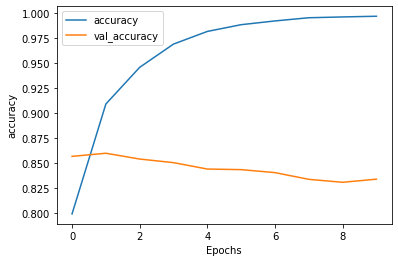

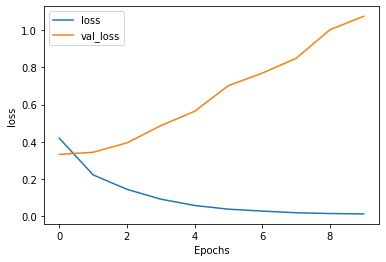

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# I will use a  Convolution Layer instead of LSTM


In [ ]:
#### The only thing different is you ad Conv1D layer instead of the Bidirictional LSTM and then the GlobalMaxPooling1D /// 
### many ways to skin the cat in NAtural Language Processing NLP  COnv1D is the fastest, then the Flatten layer, then the GRU layer
## and multilayer bidirectional LSTM the slowest to trian but most accurate , must have GPU to train it not on personal machine!


embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_conv.summary()



In [ ]:
NUM_EPOCHS = 10


history_conv = model_conv.fit(training_padded, 
                              training_labels, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(testing_padded, testing_labels))

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')